<a href="https://colab.research.google.com/github/Jucicarla/Introducao-Machine-Learning/blob/main/Clusteriza%C3%A7%C3%A3o_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab do Curso Introdução a Machine Learning

Aula 3.2 - Clusterização com K-means

Algoritmo K-means agrupa um conjunto de dados, utilizando medidas de distância e comparando-as com os centróides.s

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Informações básicas de cliente de um Shopping



1.   Annual Income - Renda Anual
2.   Spending Score - Comportamento do cliente



In [3]:
df= pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Tamanho do Dataset

In [4]:
df.shape

(200, 5)

Verificar dados nulos

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Informações estatisticas dos dados

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Com essas informações sobre os dados, você pode saber, por exemplo, que o cliente, que possui a maior idade, tem 70 anos; e que o cliente mais novo tem 18
anos. Além disso, é possível saber que 75 % dos clientes possuem renda anual de 78 mil dólares.

Criação do gráfico com a renda anual versus o score dos clientes

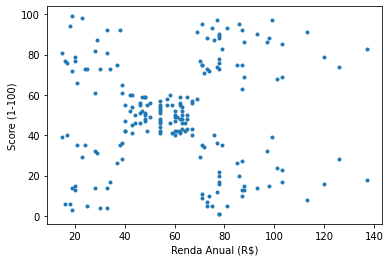

In [8]:
plt.scatter(df["Annual Income (k$)"], df ["Spending Score (1-100)"], marker='.')
plt.xlabel("Renda Anual (R$)")
plt.ylabel("Score (1-100)")
plt.show()

Como resultado, há vários pontos azuis espalhados, sendo o maior agrupamento de pontos entre 60 e 40 no score e renda anual entre 40 e 70.

**Selecionando dados para Agrupamento**

Os dados de renda anual e de score que serão usados como entrada para a clusterização

In [10]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Clusterização com k=5

In [14]:
modelo_kmeans = KMeans(n_clusters=5, init = "k-means++")
y_kmeans= modelo_kmeans.fit_predict(X)
#imprimi um array de 5 grupos
print(y_kmeans)

[2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 4 3 0 3 4 3 4 3 0 3 4 3 4 3 4 3 4 3 0 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


Verificando o primeiro grupo criado

In [18]:
print(X[y_kmeans ==0])

     Annual Income (k$)  Spending Score (1-100)
43                   39                      61
46                   40                      55
47                   40                      47
48                   40                      42
49                   40                      42
..                  ...                     ...
121                  67                      40
122                  69                      58
126                  71                      35
132                  72                      34
142                  76                      40

[81 rows x 2 columns]


Verificando os grupos - plot

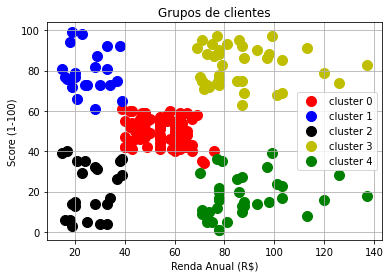

In [25]:
k_grupos = 5
cores = ['r','b','k', 'y','g']
for k in range(k_grupos):
  cluster = X[y_kmeans == k]
  plt.scatter(cluster["Annual Income (k$)"], cluster["Spending Score (1-100)"],
              s = 100, c = cores[k], label = f'cluster {k}')
  
plt.title("Grupos de clientes")
plt.xlabel("Renda Anual (R$)")
plt.ylabel("Score (1-100)")
plt.grid()
plt.legend()
plt.show()

Desse modo, a partir do resultado da análise de cluster, você perceberá, por exemplo, que o grupo de clientes com score maior que 60 e renda anual a partir de 60 mil dólares por ano corresponde ao grupo de número 0, ou seja, o primeiro grupo.